In [34]:
import os
import json as js
import xarray as xr
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [97]:
# parameters
results_dir = "/p/home/jusers/langguth1/juwels/downscaling_maelstrom/downscaling_jsc_repo/downscaling_ap5/results/wgan_t2m_destineaq"
with_cpu = False

device = "cpu" if with_cpu else "gpu"
js_file = os.path.join(results_dir, f"tracked_times_{device}.json") 
fname_out = os.path.join(results_dir, f"processing_times_{device}.png")

In [98]:
with open(js_file) as jsf:
    times_dict = js.load(jsf)

In [99]:
total_runtime = times_dict.pop("total run time")

In [101]:
print(times_dict["inference times"])

[3.1882744430040475, 0.380534408002859, 0.3800169680034742, 0.39404887400451116, 0.38454353499400895, 0.39711370099394117, 0.38106684800004587, 0.396497702007764, 0.3793068600061815, 0.39126150800439063, 0.3947883650107542, 0.38484991500445176, 0.38108965900028124, 0.39251471700845286, 0.3900634690071456, 0.39058329799445346, 0.3898403490020428, 0.38999755900294986, 0.42950103800103534, 0.38822613400407135, 0.3915532009996241, 0.3880236239929218, 0.3842715880018659, 0.3845020689914236, 0.39630085599492304, 0.3857293969922466, 0.38179194199619815, 0.39016616200387944, 0.3955622960056644, 0.384282979008276, 0.39911925100022927, 0.39253063799696974, 0.3965052830026252, 0.38569674699101597, 0.39486143601243384, 0.3990273499948671, 0.3833512989949668, 0.40137294799205847, 0.41603664099238813, 0.3974550620041555, 0.3951406050036894, 0.38495695899473503, 0.3971278630051529, 0.3823890719941119, 0.3804599419963779, 0.38018559200281743, 0.41034831399156246, 0.3922616469935747, 0.3953106929984642

In [107]:
from collections import OrderedDict

key_order = ('reading times', 'preprocessing times', 'model load times', 'inference times',
             "postprocessing times", "plotting times")
new_dict = OrderedDict()
for k in key_order:
    new_dict[k] = times_dict[k]

In [108]:
ds_times = xr.Dataset({key: xr.DataArray(values, coords={"step": np.arange(len(values)) + 1}, dims=["step"], name=key)
                            for key, values in new_dict.items()})

In [109]:
da_times = ds_times.to_array()

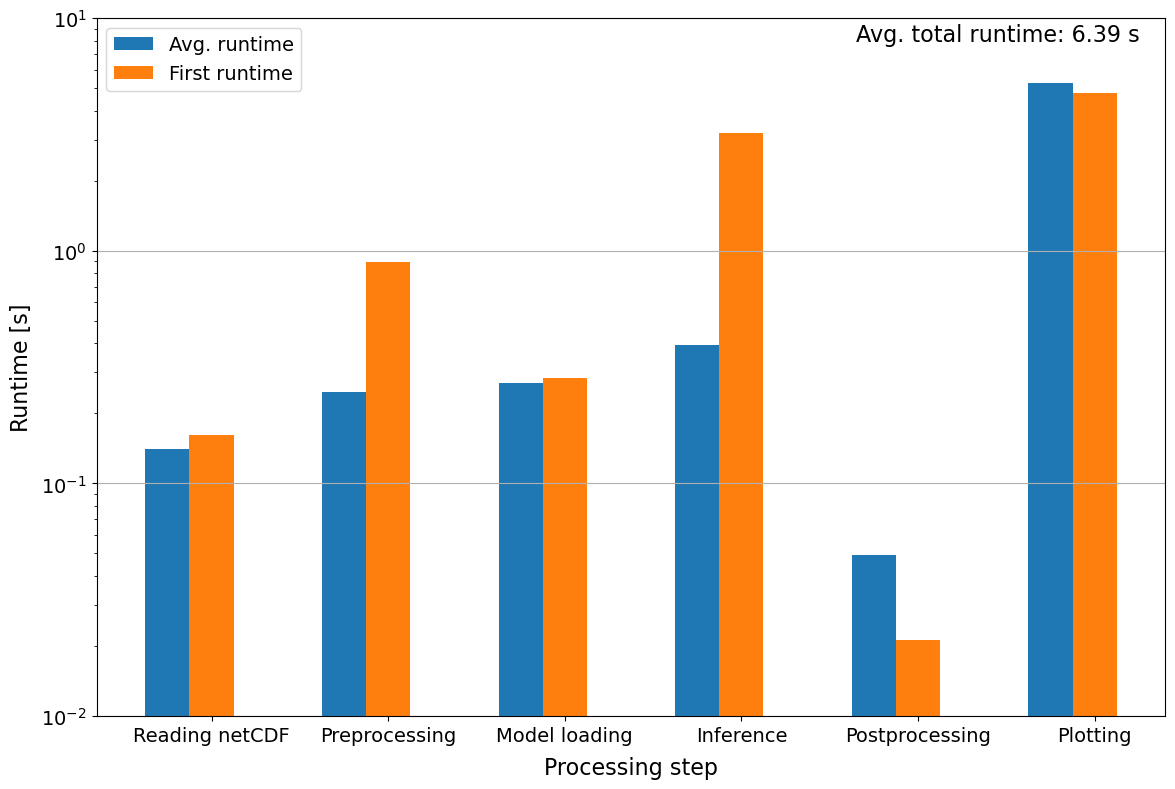

In [115]:
%matplotlib inline

fig, ax = plt.subplots(figsize=(12, 8))

labels = ["Reading netCDF", "Preprocessing", "Model loading", "Inference", "Postprocessing", "Plotting", ]
runtimes = {'Avg. runtime': da_times[:, 1::].mean(dim="step").values,
            'First runtime': da_times[:, 0].values}

x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

for att, measurement in runtimes.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, tick_label=labels, label=att)
    multiplier += 1

fs = 16
title = ""

ax.set_yscale('log')
ax.set_ylim(1e-02, 1e01)
ax.set_title(title, fontsize=fs + 2)
ax.set_xlabel("Processing step", fontsize=fs, labelpad=8)
ax.set_ylabel("Runtime [s]", fontsize=fs, labelpad=6)
ax.tick_params(axis="both", which="both", direction="out", labelsize=fs-2)
ax.yaxis.grid(True)
ax.legend(loc="upper left", fontsize=fs-2)

ax.text(3.9, 8, f"Avg. total runtime: {total_runtime/100:.2f} s", fontsize=fs)

# save plot
plt.tight_layout()
plt.savefig(fname_out)
#plt.close(fig)


In [96]:
print(total_runtime/100)

6.387857867419952
